# STAT 201 Group 3 Project Proposal

# Public Art in Vancouver

## Introduction

Vancouver is home to diverse cultural displays. <mark>TODO</mark>

In this project, we will try to answer the following question: 

> Is the mean installation year of the public art in Downtown later than in Mount Pleasant?

The dataset we plan to work on is named 'Public Art' and is sourced from the City of Vancouver's Open Data Portal. The dataset contains information on the location, artist, and installation date of public art in Vancouver, ranging from the early 1900s to 2022. Since the data has been updated routinely over the years, we assume that the dataset contains most of the population of interest. So for the purpose of , we will simulate sampling by taking a sample of `n = 80` (40 from each category) of the population and conduct our analysis using that. Our location parameter is the mean and our scale parameter is the standard deviation.<mark>

## Preliminary Results

In [67]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(tidymodels)
library(grid)
library(gridExtra)

### Reading the file from the web

In [68]:
# Code to download file from: https://datasciencebook.ca/reading.html
url <- "https://opendata.vancouver.ca/explore/dataset/public-art/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B"
art_data <- read_csv2(url)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 659 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (16): ArtistProjectStatement, Type, Status, SiteName, SiteAddress, Prima...
dbl  (2): RegistryID, YearOfInstallation

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [69]:
head(art_data)

RegistryID,ArtistProjectStatement,Type,Status,SiteName,SiteAddress,PrimaryMaterial,URL,PhotoURL,Ownership,Neighbourhood,LocationOnsite,Geom,Geo Local Area,DescriptionOfwork,Artists,PhotoCredits,YearOfInstallation
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2,"Commissioned by Duncan McNab and Associates, architects, and the engineering firm working on the Aquatic Centre.",Sculpture,In place,Vancouver Aquatic Centre,1050 Beach Avenue,Silicon bronze,https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=2,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/922bdce5fdfe90a5e586feebda0551b1,City of Vancouver,West End,Front entrance facing north,"{""coordinates"": [-123.135029, 49.27699], ""type"": ""Point""}",West End,"An abstract form representing the motion of swimming, this bronze sculpture is mounted on two poles in front of the Aquatic Centre.",264,Barbara Cole,1977
3,"Erected under the auspices of the Centennial Committee of Vancouver in cooperation with the Parks Board, the sculpture was presented to the City by Cunningham Drug Stores Ltd. whose first store was opened at Denman and Nelson Streets in 1911. The inscription reads, "" I mark my hours by shadow, mayest thou mark thine by sunshine."" The sundial commemorates three English ""greenhorns"" - Samual Brighouse, John Morton, and William Hailstone who in 1862 filed the first land claim and planned the first home and industry in the then heavily wooded area now bounded by Burrard Inlet, Stanley Park, English Bay and Burrard Street to which they received title in 1867.",Sculpture,In place,NA,NA,"bronze, stone, granite",https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=3,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/64cd73d9faab380800c3ef951960c896,City of Vancouver,West End,In centre of public seating area,NA,NA,"A classic bronze sundial sits on top of a 4'5"" high rectangular granite pedestal engraved with abstract modernist geometric designs. A second edition of the sundial was commissioned for the VanDusen Gardens around 1972.",41,NA,1967
4,NA,Fountain or water feature,No longer in place,Beach Towers Apartments,1600 Beach Avenue,"Steel & copper, mosaic tile",https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=4,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/cf9396569998a4e661d0570cbaf23a4b,private,West End,On west and east sides of the east tower,"{""coordinates"": [-123.142216, 49.28408], ""type"": ""Point""}",West End,Two copper ship-like abstract forms grace a pool of green water at this apartment dwelling.,145,NA,1965
12,"Rainforest was designed in response to a call for public outdoor sculptures to be constructed and exhibited at Expo ‘86 in Vancouver. The piece was fabricated in Vanier Park during the summer of 1986 where visitors were invited to watch the construction process and interact with the artist. The piece primarily consists of numerous parallel steel pipes intended to provide the sense of driving rain. Attached to many of these angled rain-like elements are shorter smaller pipes producing a simplified tree forms. Interspersed among the pipe components are various objects associated with forestry; a crosscut saw, a baseball bat, a ladder, a house, all set at the identical angle to the tree branches. The intention is to merge the visual sense of driving rain with trees and objects associated with forestry. Excessive repetition causes the piece to appear both chaotic and ordered. Hopefully viewers can focus on any one of, or all of these elements simultaneously.",Sculpture,No longer in place,On loan to The Reach Gallery in Abbotsford,NA,Steel,https://covapp.vancouver.ca/PublicArtRegistry/ArtworkDetail.aspx?ArtworkId=12,https://opendata.vancouver.ca/api/v2/catalog/datasets/public-art/files/9d8ad24e5bdbfaa685cc209b52b1c31d,City of Vancouver,NA,NA,NA,NA,"Rainfore

### Cleaning and wrangling the dataset

The raw dataset contains data we don't need, so we'll `select` and `filter`.

In [70]:
art_data <- art_data %>%
    select(Neighbourhood, YearOfInstallation) %>%
    filter(!is.na(Neighbourhood) & !is.na(YearOfInstallation))

head(art_data)

Neighbourhood,YearOfInstallation
<chr>,<dbl>
West End,1977
West End,1967
West End,1965
Mount Pleasant,1948
Grandview-Woodland,1959
Downtown,1966


Let's draw a random sample of `n = 80` from the population.

In [71]:
### Code from Worksheet 6, 3.4

set.seed(11)

art_sample <- 
    art_data %>% 
    filter(Neighbourhood == "Downtown") %>% 
    sample_n(size = 40) %>% 
    bind_rows(
        art_data %>% 
            filter(Neighbourhood == "Mount Pleasant") %>% 
            sample_n(size = 40))

head(art_sample)

Neighbourhood,YearOfInstallation
<chr>,<dbl>
Downtown,2006
Downtown,2016
Downtown,1997
Downtown,2000
Downtown,2016
Downtown,2011


### Data exploration

Here we compute summary statistics of the parameter (`Year of Installation`) we identified across our groups (`Neighbourhood`'s `Downtown` & `Mount Pleasant`). Although the primary focus of our inferential analysis will surround the mean, </mark>the other summary stats</mark> help us get a sense of the data's characteristics. The data visualization after includes the point estimates of the mean as well.

<mark>TODO: elaboration </mark> 

In [81]:
n <- nrow(art_data)

art_sample_stats <- art_sample %>%
    group_by(Neighbourhood) %>%
    summarise(mean = mean(YearOfInstallation), median = median(YearOfInstallation), sd = sd(YearOfInstallation))

art_sample_stats

Neighbourhood,mean,median,sd
<chr>,<dbl>,<dbl>,<dbl>
Downtown,2003.025,2009.5,20.13861
Mount Pleasant,2006.650,2015.0,19.54029


### Data visualization

Now we'll plot the distribution of the raw data in a histogram and boxplot for both categories.

<mark>TODO: add vline for means, describe plots - normality, shape, spread, WHAT THIS MEANS, CLT's application </mark>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



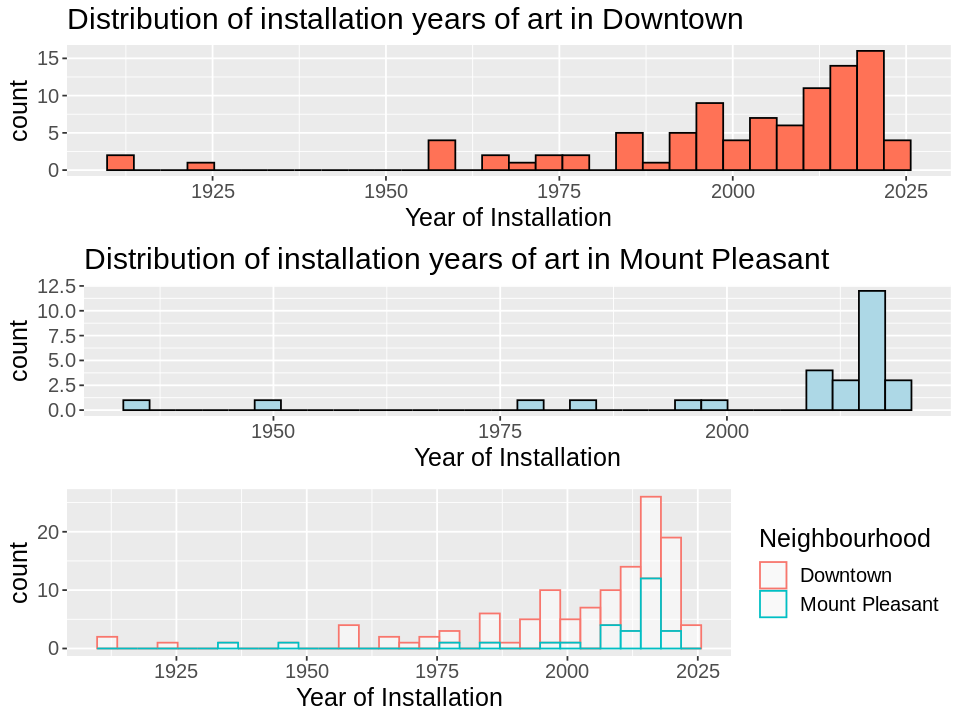

In [40]:
### Code to arrange the plots: Worksheet 8, 3.1
### Code for overlaid histograms and vline():
#   http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization

plots <- list()

# Downtown
plots[[1]] <- art_data %>%
    filter(Neighbourhood == "Downtown") %>%
    ggplot() +
    geom_histogram(aes(x = YearOfInstallation), color = "black", fill = "coral1") +
    ggtitle("Distribution of installation years of art in Downtown") +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15))

# Mount Pleasant
plots[[2]] <- art_data %>%
    filter(Neighbourhood == "Mount Pleasant") %>%
    ggplot() +
    geom_histogram(aes(x = YearOfInstallation), color = "black", fill = "lightblue") +
    ggtitle("Distribution of installation years of art in Mount Pleasant") +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15))

# Overlaid histograms
plots[[3]] <- art_data %>%
    ggplot(aes(x = YearOfInstallation, color = Neighbourhood)) +
    geom_histogram(fill="white", alpha = 0.5) +
    xlab("Year of Installation") +
    theme(text = element_text(size = 15))

grid.arrange(grobs = plots, ncol = 1)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


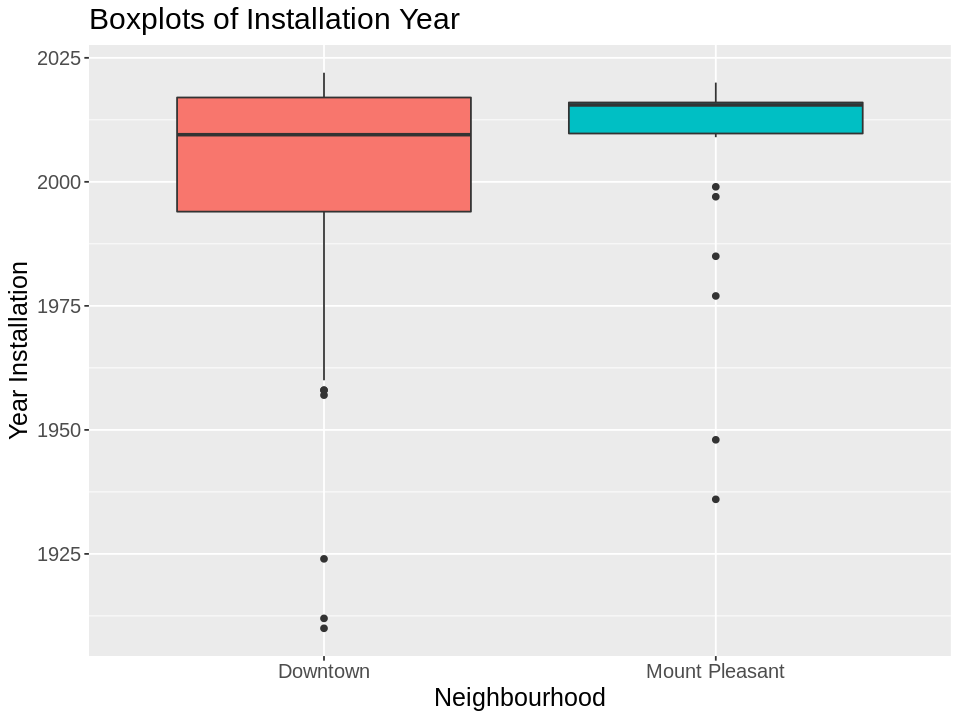

In [45]:
inst_year_boxplots <-
    art_data %>% 
    ggplot() +
    geom_boxplot(aes(Neighbourhood, YearOfInstallation, fill = Neighbourhood)) +
    theme(text = element_text(size = 15)) +
    ggtitle("Boxplots of Installation Year") + 
    xlab("Neighbourhood") + 
    ylab("Year Installation") + 
    guides(fill = FALSE)

inst_year_boxplots

## Methods

<mark>TODO</mark>

Our hypotheses:

$H_0: m_1-m_2 = 0$ vs $H_1: m_1-m_2 < 0$

1. Specify the variable of interest (`specify()`);
2. Define your hypotheses (`hypothesise()`);
3. Simulate the observations (`generate()`);
4. Generate values from the null model (`calculate()`);
5. See how the observed statistic compares with the sampling distribution by checking the p-value.

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

## References